In [67]:
import numpy as np
import math as mt
import sympy as sp
import random as rd
import matplotlib.pyplot as plt

In [68]:
#미분법 1-1

x = sp.symbols('x')

f = 2*sp.sin(x) + 0.5*x

f_prime = sp.diff(f, x)

f_double_prime = sp.diff(f_prime, x)

critical_points = sp.solveset(f_prime, x, domain=sp.Interval(-5, 13))

second_derivative_at_critical = [f_double_prime.subs(x, pt) for pt in critical_points]

function_values_at_critical = [f.subs(x, pt) for pt in critical_points]

min_value = min(function_values_at_critical)
min_index = function_values_at_critical.index(min_value)
min_x = critical_points.args[min_index]
min_y = min_value

# 출력
print(min_x, min_y)


-1.82347658193698 -2.84822996407220


In [69]:
#뉴톤법 1-2
x = sp.symbols('x')

f = 2*sp.sin(x) + 0.5*x

f_prime = sp.diff(f, x)

def newton_method(x_values):
    Differential_value = f_prime.subs(x, x_values).evalf()
    Function_value = f.subs(x, x_values).evalf()
    newton_method_value = x_values - Function_value/Differential_value
    return newton_method_value

# f(x) = 0값 찾기
num = 0
List_of_results = [13]  #초기값 설정
while True:
    if f.subs(x, List_of_results[-1]).evalf() == 0:
        print(f'x = {List_of_results[-1]} y = {f.subs(x, List_of_results[-1])}')
        break
    List_of_results.append(newton_method(List_of_results[num]))
    num += 1

x = 0 y = 0


In [70]:
# 경사 하강법 1-3

#변수 전의
x = sp.symbols('x')

#함수 정의
f = 2 * sp.sin(x) + 0.5 * x

# 미분해서 기울기(gradient) 구하기
f_prime = sp.diff(f, x)
f_prime_func = sp.lambdify(x, f_prime, modules=['numpy'])  # 수치 계산용 함수로 변환

# 초기값
x_val = 13

# 하이퍼파라미터
learning_rate = 1.7286
epochs = 1000

# 경사 하강법 수행
for epoch in range(epochs):
    grad = f_prime_func(x_val)
    x_val = x_val - learning_rate * grad 
    if round(grad, 1) == 0.0:   
        print(f"반복 횟수 {epoch}, x = {x_val:.6f}, 기울기 값 = {grad:.6f}")
        break


반복 횟수 9, x = 8.193441, 기울기 값 = -0.038631


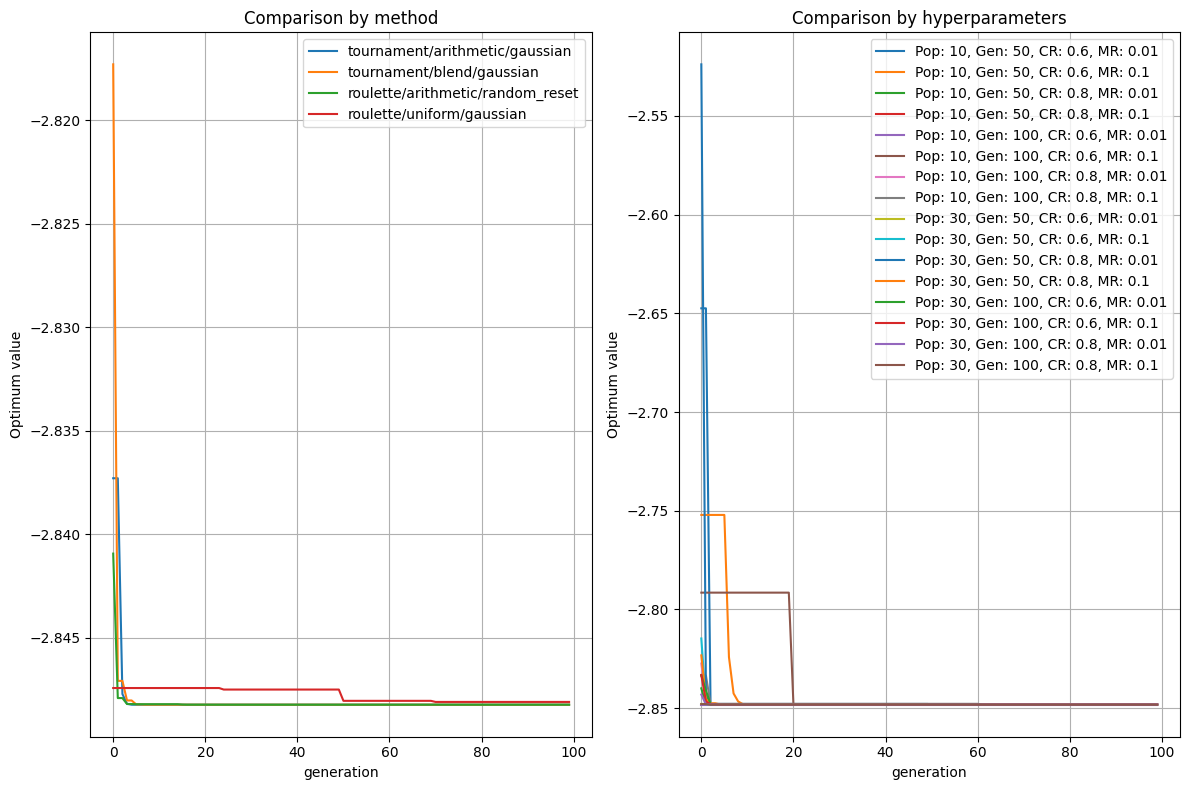

In [ ]:
#1-4번
rd.seed(47)
def objective(x):
    return 2 * np.sin(x) + 0.5 * x

# 초기 개체 생성
def create_individual():
    return rd.uniform(-5, 13)

def create_population(size):
    return [create_individual() for _ in range(size)]

# 적합도 (최소화 → -f(x))
def evaluate(population):
    return [-objective(ind) for ind in population]

# 선택 연산
def select(population, scores, method='tournament', k=3):
    if method == 'tournament':
        selected = rd.sample(list(zip(population, scores)), k)
        selected.sort(key=lambda x: x[1], reverse=True)
        return selected[0][0]
    elif method == 'roulette':
        min_score = min(scores)
        adjusted = [s - min_score + 1e-6 for s in scores]  # +1e-6로 0 방지
        total = sum(adjusted)
        probs = [s / total for s in adjusted]
        return population[np.random.choice(len(population), p=probs)]

# 교차 연산
def crossover(p1, p2, method='arithmetic'):
    if method == 'arithmetic':
        alpha = 0.5
        return alpha * p1 + (1 - alpha) * p2
    elif method == 'blend':
        gamma = 0.4
        min_val = min(p1, p2)
        max_val = max(p1, p2)
        range_val = max_val - min_val
        return rd.uniform(min_val - gamma * range_val, max_val + gamma * range_val)
    elif method == 'uniform':
        return p1 if rd.random() < 0.5 else p2

# 돌연변이 연산
def mutate(x, mutation_rate=0.1, method='gaussian'):
    if rd.random() < mutation_rate:
        if method == 'gaussian':
            x += np.random.normal(0, 1)
        elif method == 'random_reset':
            x = rd.uniform(-5, 13)
    return np.clip(x, -5, 13)

# GA 메인 함수
def genetic_algorithm(pop_size=50, generations=100, crossover_rate=0.8, mutation_rate=0.05,
                      selection_method='tournament', crossover_method='arithmetic', mutation_method='gaussian'):
    population = create_population(pop_size)
    best_scores = []

    for gen in range(generations):
        scores = evaluate(population)
        next_population = []

        elite_idx = np.argmax(scores)
        next_population.append(population[elite_idx])

        while len(next_population) < pop_size:
            p1 = select(population, scores, method=selection_method)
            p2 = select(population, scores, method=selection_method)

            if rd.random() < crossover_rate:
                child = crossover(p1, p2, method=crossover_method)
            else:
                child = p1

            child = mutate(child, mutation_rate, method=mutation_method)
            next_population.append(child)

        population = next_population
        best_scores.append(-max(evaluate(population)))

    return best_scores

# 하이퍼파라미터 실험
def experiment_with_hyperparameters():
    population_sizes = [10, 30]
    generations = [50, 100]
    crossover_rates = [0.6, 0.8]
    mutation_rates = [0.01, 0.1]
    
    fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

    # 방법에 따른 비교
    combinations = [
        ('tournament', 'arithmetic', 'gaussian'),
        ('tournament', 'blend', 'gaussian'),
        ('roulette', 'arithmetic', 'random_reset'),
        ('roulette', 'uniform', 'gaussian'),
    ]
    ax[0].set_title("Comparison by method")
    ax[0].set_xlabel("generation")
    ax[0].set_ylabel("Optimum value")

    for sel, cross, mut in combinations:
        best_scores = genetic_algorithm(
            selection_method=sel, crossover_method=cross, mutation_method=mut,
            pop_size=30, generations=100, crossover_rate=0.8, mutation_rate=0.05
        )
        ax[0].plot(best_scores, label=f"{sel}/{cross}/{mut}")

    ax[0].legend()
    ax[0].grid()

    # 하이퍼파라미터에 따른 비교
    ax[1].set_title("Comparison by hyperparameters")
    ax[1].set_xlabel("generation")
    ax[1].set_ylabel("Optimum value")

    for pop_size in population_sizes:
        for gen in generations:
            for cross_rate in crossover_rates:
                for mut_rate in mutation_rates:
                    best_scores = genetic_algorithm(
                        pop_size=pop_size, generations=gen, crossover_rate=cross_rate, mutation_rate=mut_rate,
                        selection_method='tournament', crossover_method='arithmetic', mutation_method='gaussian'
                    )
                    ax[1].plot(best_scores, label=f"Pop: {pop_size}, Gen: {gen}, CR: {cross_rate}, MR: {mut_rate}")

    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

# 실행
experiment_with_hyperparameters()

In [72]:
#2번 문제
import random

# 설정
GENE_LENGTH = 5  # x와 y 각각 5비트
CHROMOSOME_LENGTH = GENE_LENGTH * 2  # x + y
POPULATION_SIZE = 10
GENERATIONS = 30
MUTATION_RATE = 0.1
MUTATION_RATIO = 0.2  # 돌연변이 개체 비율

def decode(chromosome):
    x = int(chromosome[:GENE_LENGTH], 2)
    y = int(chromosome[GENE_LENGTH:], 2)
    return x, y

def is_feasible(x, y):
    return (
        -x + y <= 5 and
        x + y <= 10 and
        -2*x + y >= -10 and
        x >= 0 and y >= 0
    )

def fitness(chromosome):
    x, y = decode(chromosome)
    return x + 2*y if is_feasible(x, y) else 0

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        x = random.randint(0, 31)
        y = random.randint(0, 31)
        chromosome = f"{x:05b}{y:05b}"
        population.append(chromosome)
    return population

def selection(population):
    # 적합도 기반 비례 선택 (룰렛 휠)
    total_fitness = sum(fitness(c) for c in population)
    if total_fitness == 0:
        return random.choices(population, k=POPULATION_SIZE)
    probabilities = [fitness(c)/total_fitness for c in population]
    return random.choices(population, weights=probabilities, k=POPULATION_SIZE)

def crossover(p1, p2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    c1 = p1[:point] + p2[point:]
    c2 = p2[:point] + p1[point:]
    return c1, c2

def mutate(chromosome):
    chromosome = list(chromosome)
    for i in range(len(chromosome)):
        if random.random() < MUTATION_RATE:
            chromosome[i] = '1' if chromosome[i] == '0' else '0'
    return ''.join(chromosome)

# 메인 알고리즘
population = initialize_population()

for generation in range(GENERATIONS):
    selected = selection(population)
    next_generation = []

    # 교차 (짝수 쌍으로 구성)
    for i in range(0, POPULATION_SIZE, 2):
        c1, c2 = crossover(selected[i], selected[i+1])
        next_generation.extend([c1, c2])

    # 돌연변이 적용 (20% 개체, 각 비트 10% 확률)
    num_mutate = int(MUTATION_RATIO * POPULATION_SIZE)
    indices = random.sample(range(POPULATION_SIZE), num_mutate)
    for idx in indices:
        next_generation[idx] = mutate(next_generation[idx])

    population = next_generation

# 결과 출력
best = max(population, key=lambda c: fitness(c))
x_best, y_best = decode(best)
print(f"최적 해: x = {x_best}, y = {y_best}, 목적함수값 = {fitness(best)}")


최적 해: x = 4, y = 6, 목적함수값 = 16


In [73]:
#3번 문재

NUM_NODES = 8
POP_SIZE = 100
GENS = 200
MUT_RATE = 0.1

# 거리 행렬 정의
distance_matrix = np.array([
    [0, 2, 9, 10, 7, 3, 8, 6],
    [2, 0, 6, 4, 3, 5, 7, 9],
    [9, 6, 0, 8, 5, 4, 6, 3],
    [10, 4, 8, 0, 6, 2, 1, 5],
    [7, 3, 5, 6, 0, 3, 2, 4],
    [3, 5, 4, 2, 3, 0, 7, 8],
    [8, 7, 6, 1, 2, 7, 0, 3],
    [6, 9, 3, 5, 4, 8, 3, 0]
])

# 거리 계산 함수
def path_length(path):
    return sum(distance_matrix[path[i], path[i+1]] for i in range(NUM_NODES-1)) + distance_matrix[path[-1], path[0]]

# 초기 집단 생성
def init_population():
    return [random.sample(range(NUM_NODES), NUM_NODES) for _ in range(POP_SIZE)]

# 선택
def selection(population):
    return min(random.sample(population, 5), key=path_length)

# 교차 (Ordered Crossover)
def crossover(p1, p2):
    start, end = sorted(random.sample(range(NUM_NODES), 2))
    child = [None]*NUM_NODES
    child[start:end+1] = p1[start:end+1]
    fill = [n for n in p2 if n not in child]
    j = 0
    for i in range(NUM_NODES):
        if child[i] is None:
            child[i] = fill[j]
            j += 1
    return child

# 돌연변이 (Swap Mutation)
def mutate(path):
    if random.random() < MUT_RATE:
        i, j = random.sample(range(NUM_NODES), 2)
        path[i], path[j] = path[j], path[i]
    return path

# 메인 유전 알고리즘
def genetic_algorithm():
    population = init_population()
    for gen in range(GENS):
        new_pop = []
        for _ in range(POP_SIZE):
            p1, p2 = selection(population), selection(population)
            child = crossover(p1, p2)
            new_pop.append(mutate(child))
        population = new_pop
    best = min(population, key=path_length)
    return best, path_length(best)

# 실행
best_path, best_dist = genetic_algorithm()
print("최적 경로:", best_path)
print("최단 거리:", best_dist)


최적 경로: [7, 2, 4, 1, 0, 5, 3, 6]
최단 거리: 22


In [74]:
#4번
import random
from collections import defaultdict
import copy

DAYS = ['월', '화', '수', '목', '금']
HOURS = list(range(1, 19))  # 1~18교시
LUNCH = [7, 8]

# 자동 할당 규칙 정의
AUTO_RULES = {
    ('월', 1): ('수', 4), ('월', 4): ('수', 1), ('월', 9): ('수', 12), ('월', 12): ('수', 9),
    ('화', 1): ('목', 4), ('화', 4): ('목', 1), ('화', 9): ('목', 12), ('화', 12): ('목', 9)
}

# 고정 교양 시간표 (학년별)
FIXED = {
    1: [('월',12), ('월',13), ('월',14), ('수',9), ('수',10), ('수',11), ('화',4), ('화',5), ('화',6), ('수',15), ('수',16), ('수',17), ('수',18)],
    2: [('월',9), ('월',10), ('월',11), ('수',12), ('수',13), ('수',14), ('화',1), ('화',2), ('화',3), ('목',4), ('목',5), ('목',6),
        ('화',9), ('화',10), ('화',11), ('화',12), ('화',13), ('화',14), ('목',9), ('목',10), ('목',11), ('수',15), ('수',16), ('수',17), ('수',18)],
    3: [('월',9), ('월',10), ('월',11), ('수',12), ('수',13), ('수',14), ('화',1), ('화',2), ('화',3), ('목',4), ('목',5), ('목',6), ('수',15), ('수',16), ('수',17), ('수',18)],
    4: [('수',15), ('수',16), ('수',17), ('수',18)]
}

# 과목 설정
tasks = {
        1: [("영상이해", 3), ("소프트웨어적 사고", 3), ("인공지능 기초", 3), ("AI기초수학", 3)],
        2: [("알고리즘", 3), ("리눅스", 3), ("기계학습", 3), ("딥러닝", 3)],
        3: [("웹프로그래밍", 3), ("자연어", 3), ("첨단신경망", 3), ("리빙랩", 6), ("강화학습", 3)],
        4: [("프로젝트2", 3), ("리빙랩2", 6), ("세미나", 6), ("프로젝트1", 3)]
    }

class Class:
    def __init__(self, professor, day, start_hour, duration, grade, is_auto=False):
        self.professor = professor
        self.day = day
        self.start_hour = start_hour
        self.duration = duration
        self.grade = grade
        self.is_auto = is_auto

    def hours(self):
        return list(range(self.start_hour, self.start_hour + self.duration))

    def key(self):
        return (self.professor, self.day, self.start_hour, self.grade)

    def __repr__(self):
        tag = "(A)" if self.is_auto else ""
        return f"{self.grade}학년-{self.professor}교수 {self.day} {self.start_hour}-{self.start_hour+self.duration-1}{tag}"

def generate_class(professor, duration, grade):
    while True:
        day = random.choice(DAYS)
        hour = random.randint(1, 18 - duration + 1)
        # 점심시간 포함 여부 확인
        if any(h in LUNCH for h in range(hour, hour + duration)):
            continue
        # 고정 시간 회피
        if any((day, h) in FIXED.get(grade, []) for h in range(hour, hour + duration)):
            continue
        return Class(professor, day, hour, duration, grade)

def generate_auto_class(cls):
    if cls.is_auto:
        return None
    key = (cls.day, cls.start_hour)
    if key in AUTO_RULES:
        auto_day, auto_start = AUTO_RULES[key]
        return Class(cls.professor, auto_day, auto_start, cls.duration, cls.grade, is_auto=True)
    return None

def regenerate_auto_classes(schedule):
    base = [cls for cls in schedule if not cls.is_auto]
    autos = []
    for cls in base:
        auto = generate_auto_class(cls)
        if auto:
            autos.append(auto)
    return base + autos

def generate_schedule():
    schedule = []
    for grade, cls_list in tasks.items():
        for prof, dur in cls_list:
            new_cls = generate_class(prof, dur, grade)
            schedule.append(new_cls)
    return regenerate_auto_classes(schedule)

def is_conflict(cls1, cls2):
    if cls1.day != cls2.day:
        return False
    if cls1.grade == cls2.grade:
        if set(cls1.hours()) & set(cls2.hours()):
            return True
    if cls1.professor == cls2.professor:
        if set(cls1.hours()) & set(cls2.hours()):
            return True
    return False

def fitness(schedule):
    score = 0
    for i, cls1 in enumerate(schedule):
        for cls2 in schedule[i+1:]:
            if is_conflict(cls1, cls2):
                score -= 10
    prof_days = defaultdict(set)
    for cls in schedule:
        prof_days[cls.professor].add(cls.day)
    for days in prof_days.values():
        if len(days) == 4:
            score += 10
        else:
            score -= abs(len(days) - 4) * 5
    return score

def crossover(sch1, sch2):
    point = random.randint(1, len(sch1)-1)
    child = sch1[:point] + sch2[point:]
    return regenerate_auto_classes(child)

def mutate(schedule):
    new_schedule = []
    for cls in schedule:
        if not cls.is_auto and random.random() < 0.1:
            new_schedule.append(generate_class(cls.professor, cls.duration, cls.grade))
        else:
            new_schedule.append(cls)
    return regenerate_auto_classes(new_schedule)

def print_schedule(schedule):
    table = defaultdict(lambda: defaultdict(str))
    for cls in schedule:
        tag = "(A)" if cls.is_auto else ""
        for h in cls.hours():
            table[(cls.grade, cls.day)][h] = f"{cls.professor}{tag}"

    for grade in sorted(tasks.keys()):
        print(f"\n==== {grade}학년 시간표 ====")
        for day in DAYS:
            row = [f"{table[(grade, day)].get(h, '---')}" for h in HOURS]
            print(f"{day}: {' '.join(row)}")

# GA
pop_size = 30
generations = 200
population = [generate_schedule() for _ in range(pop_size)]

for gen in range(generations):
    population.sort(key=fitness, reverse=True)
    next_gen = population[:5]  # elitism
    while len(next_gen) < pop_size:
        p1, p2 = random.choices(population[:15], k=2)
        child = crossover(p1, p2)
        child = mutate(child)
        next_gen.append(child)
    population = next_gen

best = population[0]
print_schedule(best)



==== 1학년 시간표 ====
월: --- --- --- 영상이해 영상이해 영상이해 --- --- 소프트웨어적 사고 소프트웨어적 사고 소프트웨어적 사고 --- --- --- --- --- --- ---
화: --- --- --- --- --- --- --- --- 인공지능 기초 인공지능 기초 인공지능 기초 AI기초수학 AI기초수학 AI기초수학 --- --- --- ---
수: 영상이해(A) 영상이해(A) 영상이해(A) --- --- --- --- --- --- --- --- 소프트웨어적 사고(A) 소프트웨어적 사고(A) 소프트웨어적 사고(A) --- --- --- ---
목: --- --- --- --- --- --- --- --- AI기초수학(A) AI기초수학(A) AI기초수학(A) 인공지능 기초(A) 인공지능 기초(A) 인공지능 기초(A) --- --- --- ---
금: --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

==== 2학년 시간표 ====
월: 리눅스 리눅스 리눅스 알고리즘 알고리즘 알고리즘 --- --- --- --- --- 기계학습 기계학습 기계학습 --- --- --- ---
화: --- --- --- 딥러닝 딥러닝 딥러닝 --- --- --- --- --- --- --- --- --- --- --- ---
수: 알고리즘(A) 알고리즘(A) 알고리즘(A) 리눅스(A) 리눅스(A) 리눅스(A) --- --- 기계학습(A) 기계학습(A) 기계학습(A) --- --- --- --- --- --- ---
목: 딥러닝(A) 딥러닝(A) 딥러닝(A) --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
금: --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

==== 3학년 시간표 ====
월: --- --- --- 웹프로그래밍 웹프로